1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

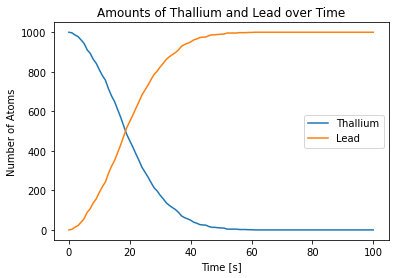

In [2]:
# Init the lists and time
N = 1000
Tl, Pb = [N], [0]
time = [0]

def decay(t):
    tau = 3.052*60
    return 1 - 2**(-t/tau)
t=0
while t < 100:
    t+=1
    probabilityOfDecay = decay(t)
    decayedAtoms = 0
    for i in range(Tl[-1]):
        if(random.random() < probabilityOfDecay):
            decayedAtoms += 1
    
    newTl = Tl[-1] - decayedAtoms
    newPb = Pb[-1] + decayedAtoms
    time.append(t)
    Tl.append(newTl)
    Pb.append(newPb)
    
    
plt.plot(time, Tl, label='Thallium')
plt.plot(time, Pb, label='Lead')
plt.title('Amounts of Thallium and Lead over Time')
plt.ylabel('Number of Atoms')
plt.xlabel('Time [s]')
plt.legend()
plt.show()

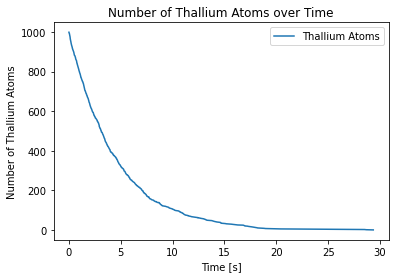

In [3]:
def nonUniDecay(t):
    tau = 3.052
    return 2.0**(-t/tau) * np.log(2.0) / tau

def icdf(x):
    tau = 3.052
    """Inverse CDF of exponential distribution - i.e. quantile function."""
    return - np.log(x) * tau / np.log(2)

randomNums = np.random.random(1000)
times = icdf(randomNums)
T = np.arange(0, 1000, 1)    

plt.plot(np.sort(times)[::-1], T, label='Thallium Atoms')
plt.xlabel('Time [s]')
plt.ylabel('Number of Thallium Atoms')
plt.title('Number of Thallium Atoms over Time')
plt.legend()
plt.show()

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [15]:
# init
E = 7.7 * 1.6021773e-13 #in joules
Z = 79 #atomic number
e = 1.6e-19 # in coulombs
a0 = 5.29177e-11 #bohr radius in meters
eps0 = 8.8541878128e-12 #epsilon naught
sigma = a0/100
N = 1000000
B = np.random.multivariate_normal([0,0], np.array([[sigma**2, 0], [0, sigma**2]]), N)

# condition is for tan(pi/4) >= 1 so 
dist = [(B[i,0]**2+B[i,1]**2)**0.5 for i in range(N)]

def theta(Z, E, b):
    return 2 * np.arctan((Z*(e**2))/(2*np.pi*eps0*E*b))
            
                      
bounced = 0
for b in dist:
    if theta(Z, E, b) > np.pi/2:
        bounced += 1

print(f'The total particles bounced back are {bounced} which is {(bounced/N)*100}% of the total particles shot')

The total particles bounced back are 1519 which is 0.1519% of the total particles shot


3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

In [22]:
def f(x):
    return (np.sin(1/(x*(2-x))))**2

N = 10000
X = np.arange(0, 2, N)

count = 0
for i in range(N):
    x = 2 * np.random.random()
    y = np.random.random()
    
    if y < f(x):
        count += 1
    
    integral = 2*count / N 

true = 1.4514
print(f'The integral calculated using the hit-miss method is {integral}, with error {np.abs((true-integral)/true)}')

X_mean = 2 * np.random.random(N)
integral_meanvalue = (2/N)*np.sum(f(X_mean))

print(f'The integral calculated using the mean-value method is {integral_meanvalue}, with error {np.abs((true-integral_meanvalue)/true)}')


The integral calculated using the hit-miss method is 1.4394, with error 0.008267879288962388
The integral calculated using the mean-value method is 1.449000471120275, with error 0.0016532512606620806


4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [26]:
def circle(x, y):
    if (x**2 + y**2 <= 1):
        return 1
    else: return 0
    
N = 1000000
count = 0
for i in range(N):
    x = np.random.random()
    y = np.random.random()
    count += circle(x, y)
    
print(f'The integral of the unit circle is {4*count/N}')


# generalize for 10d sphere
def nDsphere(X):
    if np.sum(X**2) <= 1:
        return 1
    else: return 0
countnD = 0
for i in range(N):
    dim = np.random.random(10)-1
    countnD += nDsphere(dim)

print(f'The integral of the 10d sphere is {2**(10)*countnD/N}')   

The integral of the unit circle is 3.140644
The integral of the 10d sphere is 2.47296


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [27]:
def f(x):
    return (x**-0.5)/(np.exp(x) + 1)

def w(x):
    return 1/(x**0.5)

N = 1000000
count = 0
for i in range(N):
    x = np.random.random() ** 2
    count += f(x)/w(x)
    
I = 